In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'utils')))

from config import FitSettings
from dataProcessor import DataProcessor
from templateMaker import TemplateMaker
from signalExtractor import SignalExtractor

import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot

import mplhep as hep
hep.style.use(hep.style.ALICE)

ModuleNotFoundError: No module named 'utils'

# Read the data
When the data is read it must be defined in the following way: output folder containing subfolders corresponding to the datasets. 

In [7]:
directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/030225_tableReaderwME/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/190325_nominalCuts/"
datasets = [
    #"DQ_LHC22_pass7_skimmed_dielectron_kaon",
    "DQ_LHC24aj_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24af_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ag_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24al_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24am_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24an_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ao_pass1_skimmed_dielectron_kaon"
]

In [8]:
settings = FitSettings()
processor = DataProcessor(directory_to_TRoutput_from_HL, datasets, verbose=False, settings=settings)

# Read the dataset
total_data, _ = processor.read_data(read_ME=False)

******* DATASET: DQ_LHC24aj_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24af_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24ag_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24al_pass1_skimmed_dielectron_kaon
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1572020/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571953/AO2D.root/hy_1571953 is not being read properly
⚠️ Dataframe is empty. 554207, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571945/AO2D.root/hy_1571945 is not being read properly
⚠️ Dataframe is empty. 554201, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571943/AO2D.root/hy_157

In [9]:
# Preprocess the data (removing nan and relabeling columns)
total_data = processor.pre_processing(total_data)

⚠️ WARNING: 8 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 8 candidates pass no cuts - fIsBarrelSelected =0 


In [10]:
# Translate from bitmap columns and create columns with cuts being passed
config_cuts, name_electron_cuts, name_kaon_cuts = processor.read_cuts_from_configfile()

In [11]:
# This returns a warning if there is a mismatch in the entries in the histograms of the AnalyisResults.root file and the derived dataset
processor.compare_to_AnalysisResult(total_data, verbose=False)

⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24af_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ag_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24am_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24an_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ao_pass1_skimmed_dielectron_kaon/AnalysisResults.root file no

In [12]:
#plot_bins = np.linspace(3, 10, 500)
#processor.plot_datasets(total_data, bins=plot_bins)

# Read MC

In [13]:
# reading a single AO2D.root.file 
#list_of_dataframes, _ = mc_processor.read_AO2D(MCdatapath, _, _, _, "dileptonAOD.root")
#local_run_df = pd.concat(list_of_dataframes, ignore_index=True) if list_of_dataframes else pd.DataFrame()

In [14]:
MCdatapath = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/"
mc_processor = DataProcessor(MCdatapath, ["LHC25b17"], verbose=False, settings=settings)

# Read the dataset
total_mc, _ = mc_processor.read_data(read_ME=False)

******* DATASET: LHC25b17
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651883/AO2D.root
⚠️ Dataframe is empty. 556370, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651756/AO2D.root/hy_1651756 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651749/AO2D.root
⚠️ Dataframe is empty. 555965, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651743/AO2D.root/hy_1651743 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651680/AO2D.root
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651673/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_

In [15]:
total_mc = mc_processor.pre_processing(total_mc)

⚠️ WARNING: 11 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 11 candidates pass no cuts - fIsBarrelSelected =0 


In [16]:
mc_config_cuts, mc_name_electron_cuts, mc_name_kaon_cuts = mc_processor.read_cuts_from_configfile()

In [17]:
mc_processor.compare_to_AnalysisResult(total_mc, verbose=False)

# Apply cuts

In [18]:
data_with_cuts = total_data
mc_with_cuts = total_mc

tauCut = 0.0004
chi2cut = 2

In [19]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fTauxyBcandidate"] > tauCut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fTauxyBcandidate"] > tauCut]

In [20]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fChi2Bcandidate"] < chi2cut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fChi2Bcandidate"] < chi2cut]

In [21]:
jpsi_minMass = 2.8
jpsi_maxMass = 3.2
data_with_cuts = data_with_cuts.loc[(data_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(data_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]
mc_with_cuts = mc_with_cuts.loc[(mc_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(mc_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]

# Systematic uncertainty on signal extraction

In [35]:
plt.ioff()

In [36]:
# path for storing plots
path_for_figures = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/070325_SEsystematics"

In [52]:
# define which parameters for trial
pTbin_names = ["bin0", "bin1", "bin2", "bin3", "bin4", "bin5", "bin6", "bin7"]
pTbin_edges = [0., 1., 2., 4., 6., 8., 10., 14., 24]
combkg_function_trials = ["ratio_second_degree_polynomials", "second_degree_polynomial", "exponential"]
fit_range_trials = [(3.5, 7.1), (3.7, 6.9), (3.9, 6.7), (4.1, 6.5)]
kde_window_trials = [0.01, 0.1, 0.2, 0.3, 0.4]
allowed_fluctuation_for_corrbkg_trials = [0.05, 0.1, 0.15]

In [58]:
results = pd.DataFrame()

for i, pTmin in enumerate(pTbin_edges): 
    if i < (len(pTbin_edges)-1):
        pTbin_name = pTbin_names[i]
        pTmax = pTbin_edges[i+1]

        pTpath = f"{path_for_figures}/{pTbin_name}"
        os.makedirs(pTpath, exist_ok=True)

        for combkg_function in combkg_function_trials: 

            funcpath = f"{pTpath}/{combkg_function}"
            os.makedirs(funcpath, exist_ok=True)
            
            for fitMin, fitMax in fit_range_trials:
                
                fitrangepath = f"{funcpath}/{fitMin}-{fitMax}"
                os.makedirs(fitrangepath, exist_ok=True)
                
                for kde_window in kde_window_trials:
                    
                    kde_path = f"{fitrangepath}/{kde_window}"
                    os.makedirs(kde_path, exist_ok=True)
                    
                    for fluctuation in allowed_fluctuation_for_corrbkg_trials:
                        
                        fluct_path = f"{kde_path}/{fluctuation}"
                        os.makedirs(fluct_path, exist_ok=True)
                    
                        settings = FitSettings(pTmin=pTmin, pTmax=pTmax, fitMin=fitMin, fitMax=fitMax, bin_width=0.02, kde_window=kde_window, allowed_fluctuation_for_corrbkg=fluctuation)

                        templateMaker = TemplateMaker(mc_with_cuts, settings=settings)
                        corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker.generate_mc_templates()

                        extractor = SignalExtractor(data_with_cuts, settings=settings, combkg_function=combkg_function)
                        extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
                        extractor.template_bins = template_bins
                        extractor.corrbkg_template_counts = kde_corrbkg_template

                        extractor.bin_data()
                        extractor.fit()
                        extractor.calculate_signal_size()
                        extractor.fit() 

                        # Store results
                        new_entry = pd.DataFrame({
                            "combkg_function": [combkg_function],
                            "pTmin": [pTmin],
                            "pTmax": [pTmax],
                            "signal_size": [extractor.signal_size],
                            "signal_error": [extractor.signal_size_error],
                            "significance": [extractor.significance],
                            "chi2": [extractor.chi2_reduced], 
                            "fitMin" : [fitMin],
                            "fitMax": [fitMax],
                            "allowed_fluctuation_for_corrbkg": [fluctuation],
                            "kde_window": [kde_window],
                            "signal_mean": [extractor.fit_params["mu"]],
                            "signal_sigma": [extractor.fit_params["sigma"]],
                            "Ratio of Correlated Background to Signal": [templateMaker.fraction_of_corrbkg],
                            "Shift of corr bkg": [extractor.shift_corrbkg]
                            })
                        results = pd.concat([results, new_entry], ignore_index=True)

                        fig, ax = extractor.plot_invariant_mass(legend_loc="upper right")
                        ax.text(0.01, 0.6, extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings.fontsize)
                        plt.savefig(f"{fluct_path}/SE.pdf")


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -118.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -118.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -118.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -112.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -112.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -112.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 80.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 80.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 80.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -129.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -129.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -129.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -189.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -189.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -189.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -145.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -145.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -145.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -104.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -104.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -104.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -96.00 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -96.00 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -96.00 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -214.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -214.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -214.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -134.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -134.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -134.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -189.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -189.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -189.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -111.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -111.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -111.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -120.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -120.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -120.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -76.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -76.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -76.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 127.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 127.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 127.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -77.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -77.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -77.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -102.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -102.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -102.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -115.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -115.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -115.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -54.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -54.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -54.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -154.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -154.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -154.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -36.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -36.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -36.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -64.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -64.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -64.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -82.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -82.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -82.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -101.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -101.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -101.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -123.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -123.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -123.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -11.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -11.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -11.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -36.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -36.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -36.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -60.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -60.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -60.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -87.33 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -87.33 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -87.33 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -111.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -111.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -111.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 9.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 9.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 9.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -16.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -16.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -16.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -39.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -39.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -39.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -67.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -67.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -67.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -97.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -97.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -97.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 33.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 33.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 33.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -2.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -2.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -2.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -29.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -29.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -29.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -59.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -59.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -59.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -93.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -93.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -93.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -125.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -125.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -125.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -139.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -139.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -139.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -142.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -142.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -142.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -134.20 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -134.20 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -134.20 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -107.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -107.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -107.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -118.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -118.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -118.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -140.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -140.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -140.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -133.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -133.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -133.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -91.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -91.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -91.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -109.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -109.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -109.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -132.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -132.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -132.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -124.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -124.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -124.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -80.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -80.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -80.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -78.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -78.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -78.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -106.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -106.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -106.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -113.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -113.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -113.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -116.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -116.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -116.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -113.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -113.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.66
Correlated background shifted by -113.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -82.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -82.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -82.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -79.07 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -79.07 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -79.07 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -100.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -100.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -100.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -149.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -149.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -149.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -98.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -98.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -98.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -61.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -61.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -61.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -89.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -89.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -89.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -118.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -118.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -118.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -34.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -34.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -34.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -31.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -31.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -31.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -72.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -72.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -72.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -99.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -99.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -99.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -116.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -116.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -116.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -42.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -42.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -42.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -120.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -120.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -120.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -46.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -46.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -46.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -54.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -54.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -54.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -67.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -67.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -67.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 13.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 13.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 13.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -8.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -8.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -8.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -29.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -29.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -29.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -41.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -41.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -41.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 17.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 17.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 17.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -16.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -16.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -16.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 0.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 0.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 0.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 13.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 13.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 13.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -18.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -40.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -40.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -40.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -32.50 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -32.50 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -32.50 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 179.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -53.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -53.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -53.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -91.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -91.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -91.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -101.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -101.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -101.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -113.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -113.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -113.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -112.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -112.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -112.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -83.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -83.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -83.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 28.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settin

Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 28.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settin

Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 28.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settin

Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -103.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -103.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -103.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -105.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -105.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -105.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -104.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -104.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -104.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -73.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -73.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -73.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 58.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 58.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 58.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -80.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -80.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -80.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -81.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -81.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -81.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -84.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -84.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -84.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -77.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -77.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -77.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -50.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -50.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -50.05 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 47.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 47.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 47.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 44.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 44.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 44.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 3.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)
/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 3.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 3.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.74
Correlated background shifted by -9.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -156.16 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -156.16 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -156.16 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -107.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -107.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -107.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -52.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -52.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -52.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -64.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -64.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -64.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -217.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -217.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -217.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -41.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -41.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -41.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -37.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -37.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -37.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -57.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -57.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -57.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -21.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -21.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -21.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -219.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -219.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -219.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 65.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 65.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 65.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 125.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 125.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 125.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 136.28 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 136.28 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 136.28 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 116.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 116.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 116.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 99.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 99.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 99.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 62.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 62.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 62.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 71.07 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 71.07 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 71.07 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 52.15 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 52.15 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 52.15 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 23.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 23.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 23.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -126.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -126.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -126.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 127.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 127.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 127.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 118.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 118.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 118.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 119.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 119.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 119.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 127.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 127.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 127.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 133.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 133.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 133.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 123.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 123.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 123.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 114.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 114.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 114.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 114.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 114.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 114.44 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 115.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 115.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 115.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 117.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 117.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 117.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 28.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 28.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 28.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 21.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 21.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 21.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 18.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 18.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 18.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 19.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 19.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 19.79 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.60 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.60 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.60 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 147.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -74.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -74.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -74.78 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -75.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -75.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -75.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -70.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -70.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -70.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -56.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -56.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -56.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -27.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)
/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -27.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -27.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -41.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -41.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -41.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -48.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -48.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -48.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -43.33 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -43.33 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -43.33 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -30.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -30.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)
/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -30.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -6.93 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -6.93 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by -6.93 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 124.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 54.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 26.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 26.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 26.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 24.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 24.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 24.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 2.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 2.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 2.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 29.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 29.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 29.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.26 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 49.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 49.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 49.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 27.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 27.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 27.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -89.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -89.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -89.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -109.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -109.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -109.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 16.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 16.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 16.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 25.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 25.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 25.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 25.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 25.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 25.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 20.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 20.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 20.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.16 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.16 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.16 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.20 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.20 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 22.20 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -170.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -170.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -170.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -172.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -172.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -172.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -131.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -131.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -131.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -130.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -130.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -130.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -194.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -194.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -194.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -197.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -197.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -197.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -199.28 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -199.28 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -199.28 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -204.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -204.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -204.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -210.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -210.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -210.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 29.83 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 29.83 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 29.83 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -220.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -176.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -176.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -176.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -171.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -171.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -171.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -173.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -137.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -137.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -137.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -135.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -135.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -135.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -134.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -134.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -134.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -133.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -133.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -133.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by -132.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)
/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 5.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 5.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 5.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.06 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.06 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.06 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.41 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 123.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 123.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 123.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 8.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 8.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 8.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.97 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.97 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.97 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 8.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 8.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 8.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.54 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.65 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.65 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.65 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in multiply
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably 

Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in multiply
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably 

Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in multiply
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably 

Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 23.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 20.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 20.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 20.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 21.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.04 MeV


/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.04 MeV


/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.04 MeV


/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.25 MeV


/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.25 MeV


/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.25 MeV


/Users/idats/pyenv/venv/lib/python3.13/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 6.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 11.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 9.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 7.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.85 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 6.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 6.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 6.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 18.15 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 18.15 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 18.15 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 9.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 9.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 9.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.03 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.09 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 18.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 18.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 18.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 19.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 17.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 17.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 17.75 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.98 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 7.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 7.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 7.36 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 7.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 7.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 7.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.56 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 13.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 13.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 13.87 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 13.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 13.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 13.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 16.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 12.39 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 2.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 2.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 2.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 0.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 0.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 0.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 5.93 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 5.93 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 5.93 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 0.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 0.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 0.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.42 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 9.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 9.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 9.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 8.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.53 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.53 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 15.53 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 10.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 14.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by 11.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.81
Correlated background shifted by -10.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 20.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 20.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 20.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 23.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 23.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 23.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 10.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 10.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 10.24 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 17.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 17.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 17.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.00 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.00 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.00 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 8.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 8.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 8.63 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 15.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.92 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.01 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.01 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.01 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 17.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 17.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 17.32 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.97 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.97 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.97 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 16.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.89 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.45 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.30 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.83 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.83 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.83 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.17 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.38 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.95 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.95 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.95 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 14.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 13.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.68 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 12.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.47 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 8.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 8.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 8.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.22 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.95 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.95 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.95 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.69 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.43 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.90 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 3.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 3.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 3.82 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 4.14 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 6.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 10.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 10.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 10.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:69: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.29 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.66 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.49 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 11.67 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 9.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 7.35 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.78
Correlated background shifted by 5.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.57 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.21 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 20.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 20.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 20.25 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.31 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.23 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.48 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 26.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.13 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.50 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.50 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.50 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.73 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 25.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 25.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 25.46 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.52 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.12 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 177.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 177.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 177.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.01 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.01 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.01 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.04 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 22.37 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.59 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.51 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.58 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 27.61 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.64 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.77 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.70 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.74 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.72 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.53 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.53 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.53 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.34 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 28.94 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 29.19 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 5.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 5.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 5.91 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 5.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 5.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 5.80 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 20.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 20.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 20.40 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 13.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 13.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 13.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 14.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 14.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by 14.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.10 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.27 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.99 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -11.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -11.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -11.11 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.81 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.02 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.18 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.84 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.96 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.71 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -9.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -9.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -9.88 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.08 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.62 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.76 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Ratio of Correlated Background to Signal: 0.75
Correlated background shifted by -10.55 MeV


/Users/idats/pyenv/B-team/utils/signalExtractor.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


In [102]:
plt.close("all")

# Filtering SE

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SystematicsUtils: 
    def __init__(self, df):
        
        self.df = df
        
        self.df["pTcenter"] = (self.df["pTmax"] - self.df["pTmin"]) / 2
        
        self.pTcenters = sorted(self.df["pTcenter"].unique())

    def filter_trials(self, chi2_cut):
        
        # remove bad fits
        self.filtered_df = self.df.loc[(self.df.chi2 < chi2_cut)]
        
        # remove outliers (signal size more than threshold away from signal size mean)
        #filtered_results = filtered_results.loc[filtered_results.groupby(["pTmin"])["signal_size"].mean()]
        
        print(f"{self.filtered_df.shape[0]/self.df.shape[0]*100:.2f} % of trials rejected")
    
    def plot_violin(self):
        
        data_per_bin = [self.filtered_df[self.filtered_df["pTcenter"] == pT]["signal_size"].values for pT in self.pTcenters]
        
        plt.figure(figsize=(9, 8))
        plt.violinplot(data_per_bin, positions=self.pTcenters, showmeans=True, showmedians=False)
        
        plt.show()

In [111]:
su.df.pTcenter.unique()

array([0.5, 1. , 2. , 5. ])

In [113]:
results.pTmin.unique()

array([ 0.,  1.,  2.,  4.,  6.,  8., 10., 14.])

48.06 % of trials rejected


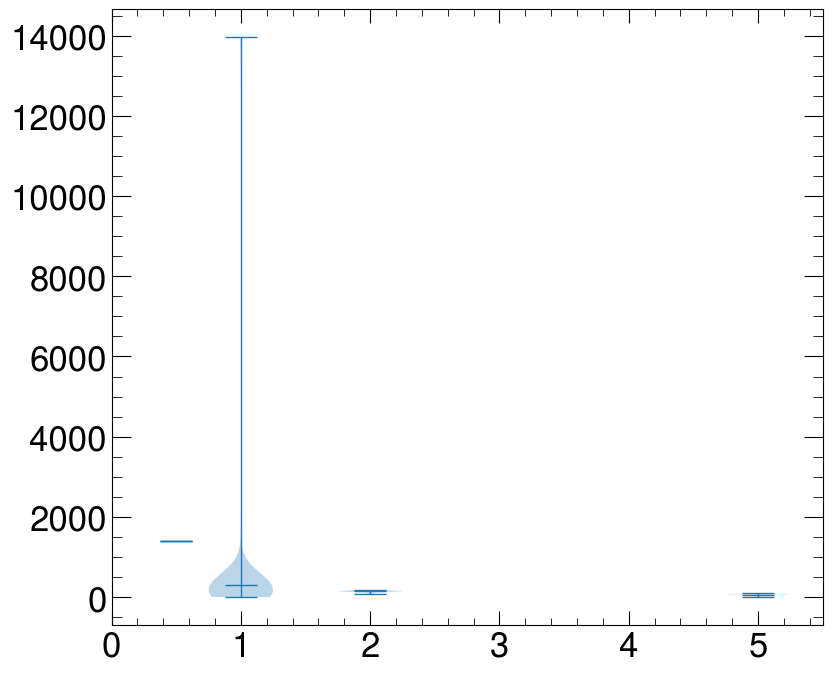

In [108]:
su = SystematicsUtils(df=results)
su.filter_trials(chi2_cut=2.5)
su.plot_violin()

# Optimize SE
Wait on new trains as there is no signal in low pT bins

# Vizualising SE systematics

In [ ]:
pTcenters = sorted(yield_per_cut_combination_filtered["pTcenter"].unique())
data_per_bin = [yield_per_cut_combination_filtered[yield_per_cut_combination_filtered["pTcenter"] == pT]["Corrected yield"].values for pT in pTcenters]

In [ ]:
data_per_bin = [yield_per_cut_combination_filtered[yield_per_cut_combination_filtered["pTcenter"] == pT]["Corrected yield"].values for pT in pTcenters]

pTbins = np.array([0., 2., 4., 6., 8., 10., 14., 24])
means = []
sys_uncertainty_on_pair = []
for i, data_in_pTbin in enumerate(data_per_bin):
    if i < len(pTbins) - 1:
        mean_in_pTbin = np.mean(data_in_pTbin)
        #print(mean_in_pTbin)
        means.append(mean_in_pTbin)
        sys_uncertainty_on_pair.append(float(np.std(data_in_pTbin)/np.mean(data_in_pTbin)))
        print(f"Uncertainty pT [{pTbins[i]}, {pTbins[i+1]}]: {(np.std(data_in_pTbin)/np.mean(data_in_pTbin))*100:.2f} %")
print(sys_uncertainty_on_pair )

In [ ]:
def plot_violin():
    plt.figure(figsize=(9, 8))
plt.violinplot(data_per_bin, positions=pTcenters, showmeans=True, showmedians=False)a

In [ ]:

# Create the violin plot
plt.figure(figsize=(9, 8))
plt.violinplot(data_per_bin, positions=pTcenters, showmeans=True, showmedians=False)
plt.plot(nominals.pTcenter, nominals.signal_size / nominals.Efficiency, "o", label="Nominal selection")

for i in range(len(means)):
    plt.plot([pTbins[i], pTbins[i + 1]], [means[i], means[i]], color='tab:blue')  # Avoid duplicate legend entry


# Labels and title
plt.xlabel(f"$p_T$ (GeV/$c$)")
plt.ylabel("Corrected yield")

# Show the plot
plt.legend()
plt.tight_layout()
plt.yscale("log")
#plt.show()
plt.savefig(f"{first_path_for_cut_plots}/systematic_uncertainty_pairCut.png")

In [69]:
filtered_results.loc[filtered_results]

,combkg_function,pTmin,pTmax,signal_size,signal_error,significance,chi2,fitMin,fitMax,allowed_fluctuation_for_corrbkg,kde_window,signal_mean,signal_sigma,Ratio of Correlated Background to Signal,Shift of corr bkg
54,ratio_second_degree_polynomials,0.0,1.0,1404.200457,230.742280,6.085579,2.125288,4.1,6.5,0.05,0.3,5.147545,0.199984,0.664614,-0.054444
55,ratio_second_degree_polynomials,0.0,1.0,1404.200457,230.742280,6.085579,2.123502,4.1,6.5,0.10,0.3,5.142556,0.200000,0.664614,-0.054444
56,ratio_second_degree_polynomials,0.0,1.0,1404.200457,230.742280,6.085579,2.182376,4.1,6.5,0.15,0.3,5.165826,0.200000,0.664614,-0.054444
417,ratio_second_degree_polynomials,2.0,4.0,13962.292340,250.956171,55.636378,2.467413,4.1,6.5,0.05,0.4,5.439295,0.200000,0.778846,-0.126624
418,ratio_second_degree_polynomials,2.0,4.0,13962.292340,250.956171,55.636378,2.344829,4.1,6.5,0.10,0.4,5.435318,0.187410,0.778846,-0.126624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,exponential,14.0,24.0,40.739770,7.681146,5.303866,0.644578,4.1,6.5,0.10,0.3,5.252964,0.057447,0.754584,-0.010765
1436,exponential,14.0,24.0,40.739770,7.681146,5.303866,0.644132,4.1,6.5,0.15,0.3,5.253939,0.058172,0.754584,-0.010765
1437,exponential,14.0,24.0,39.183308,8.062258,4.860091,0.639646,4.1,6.5,0.05,0.4,5.252346,0.056453,0.754584,-0.010553
1438,exponential,14.0,24.0,39.183308,8.062258,4.860091,0.638876,4.1,6.5,0.10,0.4,5.252956,0.057163,0.754584,-0.010553


In [ ]:
# define which parameters for trial
pTbin_names = ["bin0", "bin1", "bin2", "bin3", "bin4", "bin5", "bin6", "bin7"]
pTbin_edges = [0., 1., 2., 4., 6., 8., 10., 14., 24]
combkg_function_trials = ["ratio_second_degree_polynomials", "second_degree_polynomial", "exponential"]
fit_range_trials = [(3.5, 7.1), (3.7, 6.9), (3.9, 6.7), (4.1, 6.5)]
kde_window_trials = [0.01, 0.1, 0.2, 0.3, 0.4]
allowed_fluctuation_for_corrbkg_trials = [0.05, 0.1, 0.15]